In [1]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt

dft = pd.read_csv('PA1_train.csv')
df_train = dft.drop('id', 1)
dfd = pd.read_csv('PA1_dev.csv')
df_dev = dfd.drop('id', 1)
df_train['year'] = pd.DatetimeIndex(df_train['date']).year
df_train['month'] = pd.DatetimeIndex(df_train['date']).month
df_train['day'] = pd.DatetimeIndex(df_train['date']).day
df_dev['year'] = pd.DatetimeIndex(df_dev['date']).year
df_dev['month'] = pd.DatetimeIndex(df_dev['date']).month
df_dev['day'] = pd.DatetimeIndex(df_dev['date']).day

In [2]:
df_train = df_train.drop('date', 1)
df_dev = df_dev.drop('date', 1)

df_columns = df_train.columns.values
list_columns = df_columns.tolist()

df_cate_col = ['waterfront', 'grade', 'condition', 'zipcode'] 
print(list_columns)

['dummy', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'price', 'year', 'month', 'day']


In [3]:
for i in df_cate_col:
  list_columns.remove(i)

df_num_col = np.asarray(list_columns)
list_columns.remove('price')
df_num_col_wo_price = np.asarray(list_columns)

#statistic values
df_train_num_means = df_train[df_num_col_wo_price].mean()
df_train_num_std = df_train[df_num_col_wo_price].std()

df_train_num_max = df_train[df_num_col_wo_price].max()
df_train_num_min = df_train[df_num_col_wo_price].min()
df_train_num_range = df_train_num_max - df_train_num_min

In [5]:
# Normalizing Data
df_norm_fea = [];
for i in range(len(df_num_col_wo_price)):
  norm_fea = [];
  cur_fea = df_num_col_wo_price[i];
  print(cur_fea);
  max = df_train[cur_fea].max();
  min = df_train[cur_fea].min();
  range_val = max - min;
  for j in range(len(df_train[cur_fea])):
    cur_val = df_train[cur_fea][j];
    norm = float((cur_val - min) / (range_val) )
    norm_fea.append(norm)
  df_norm_fea.append(norm_fea)

np_norm_fea = np.asarray(df_norm_fea)
dict_norm_fea = dict(zip(df_num_col_wo_price, np_norm_fea))

df_dev_norm_fea = [];
for i in range(len(df_num_col_wo_price)):
  norm_fea = [];
  cur_fea = df_num_col_wo_price[i];
  max = df_dev[cur_fea].max();
  min = df_dev[cur_fea].min();
  range_val = max - min;
  for j in range(len(df_dev[cur_fea])):
    cur_val = df_dev[cur_fea][j];
    norm = float((cur_val - min) / (range_val) )
    norm_fea.append(norm)
  df_dev_norm_fea.append(norm_fea)


np_dev_norm_fea = np.asarray(df_dev_norm_fea)
dict_dev_norm_fea = dict(zip(df_num_col_wo_price, np_dev_norm_fea))

dummy
bedrooms


/nfs/stak/users/ohda/.local/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in long_scalars
  if sys.path[0] == '':


bathrooms
sqft_living
sqft_lot
floors
view
sqft_above
sqft_basement
yr_built
yr_renovated
lat
long
sqft_living15
sqft_lot15
year
month
day


/nfs/stak/users/ohda/.local/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in long_scalars


In [6]:
df_train_target = df_train['price']
df_dev_target = df_dev['price']


df_train_trial = df_train[df_num_col_wo_price];
for idx in range(1, len(df_num_col_wo_price)):
  df_train_trial[df_num_col_wo_price[idx]] = dict_norm_fea[df_num_col_wo_price[idx]]


df_dev_trial = df_dev[df_num_col_wo_price]
for idx in range(1, len(df_num_col_wo_price)):
  df_dev_trial[df_num_col_wo_price[idx]] = dict_dev_norm_fea[df_num_col_wo_price[idx]]


for i in range(len(df_cate_col)):
  a = pd.get_dummies(df_train[df_cate_col[i]], prefix=df_cate_col[i])
  df_train_trial = pd.concat([df_train_trial, a], axis=1)
qq = np.zeros(df_train.shape[0])
df_train_trial.insert(20, column='grade_3', value=qq)


for i in range(len(df_cate_col)):
  a = pd.get_dummies(df_dev[df_cate_col[i]], prefix=df_cate_col[i])
  df_dev_trial = pd.concat([df_dev_trial, a], axis=1)


/nfs/stak/users/ohda/.local/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/nfs/stak/users/ohda/.local/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


In [11]:
#learning_rate = [10**0, 10**-1, 10**-2, 10**-3, 10**-4, 10**-5, 10**-6, 10**-7]
learning_rate = [10**0, 10**-1, 10**-2, 10**-3, 10**-4]

epsilon = 0.5

def MSE(w, X, y):
	N = X.shape[0];
	resd = np.dot(X,w) - y;
	mse = np.sum((resd**2))/(N) 
	return mse;

def get_grad(w, X, y, N, d):
  y_pred = np.dot(X,w);
  resd = y_pred - y;
  grad_vec = (2*np.dot(X.T, resd))/N
  return resd, grad_vec;

def learning(df_vals, df_target, learning_rate, max_itr):
  t = time.time(); 
  itr_cnt = 0;
  mse_norm = 100;
  d = df_vals.shape[1];
  N = df_vals.shape[0];
  w = np.zeros(d);
  y = np.array(df_target);
  X = np.array(df_vals);

  losses = [];
  mse_norms = [];

  while (mse_norm > epsilon):
    itr_cnt += 1;
    resd, grad = get_grad(w, X, y, N, d);
    w = w - (learning_rate*grad);
    loss = np.sum((resd**2))/N
    losses.append(loss);
    mse_norm = np.linalg.norm(grad);
    mse_norms.append(mse_norm)
   

  elapsed = time.time() - t;
  return (mse_norms, losses, itr_cnt, elapsed, w);

/nfs/stak/users/ohda/.local/lib/python3.6/site-packages/ipykernel_launcher.py:35: RuntimeWarning: overflow encountered in square
/nfs/stak/users/ohda/.local/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: overflow encountered in multiply
  from ipykernel import kernelapp as app


MSE of train data with learning rate 1 :  0.0  with iteration:  337
MSE of validation data with learning rate 1 :  0.0  with iteration:  337


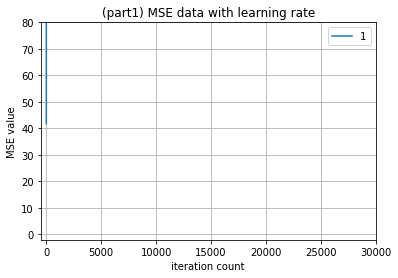

iteration score:  337
time took :  0.11575865745544434
MSE of train data with learning rate 0.1 :  4.722104004420385  with iteration:  76
MSE of validation data with learning rate 0.1 :  4.93271366040207  with iteration:  76


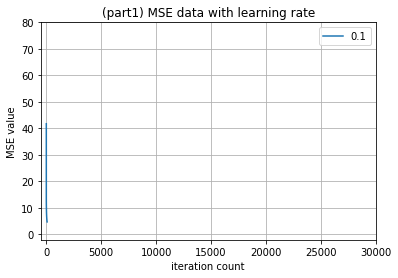

iteration score:  76
time took :  0.027085542678833008
MSE of train data with learning rate 0.01 :  4.760923756658479  with iteration:  748
MSE of validation data with learning rate 0.01 :  4.971123606382196  with iteration:  748


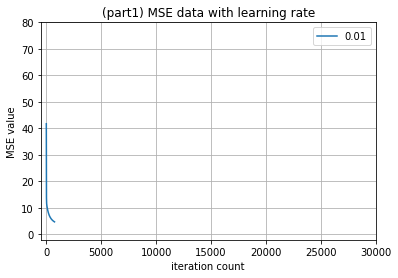

iteration score:  748
time took :  0.24572300910949707
MSE of train data with learning rate 0.001 :  4.7631225403489035  with iteration:  7475
MSE of validation data with learning rate 0.001 :  4.973321107666561  with iteration:  7475


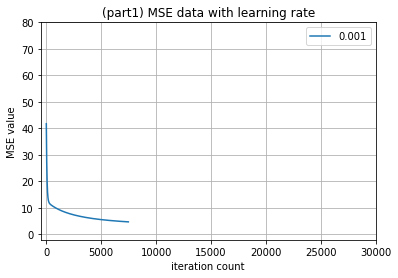

iteration score:  7475
time took :  2.334195613861084
MSE of train data with learning rate 0.0001 :  4.7633426004894055  with iteration:  74745
MSE of validation data with learning rate 0.0001 :  4.973541029158608  with iteration:  74745


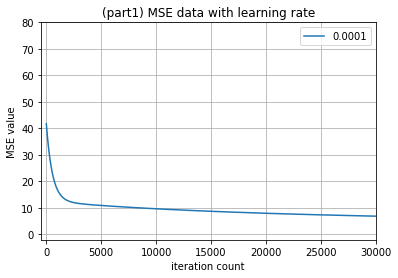

iteration score:  74745
time took :  24.85783839225769


In [12]:
mse_norms, losses, itr_cnt, elapsed, weights = learning(df_dev_trial, df_dev_target, learning_rate[2], 100000)
w_dic = dict(zip(df_dev_trial.columns, weights))
dff = pd.DataFrame(w_dic, index=[0])

for i in range(len(learning_rate)):
  mse_norms, losses, itr_cnt, elapsed, weights = learning(df_train_trial, df_train_target, learning_rate[i], 1000000)
  
  cur_mse_train = MSE(weights, df_train_trial, df_train_target);
  print('MSE of train data with learning rate ' + str(learning_rate[i]) + " : ", cur_mse_train, " with iteration: ", itr_cnt);
  cur_mse_dev = MSE(weights, df_dev_trial, df_dev_target);
  print('MSE of validation data with learning rate ' + str(learning_rate[i]) + " : ", cur_mse_dev, " with iteration: ", itr_cnt);

  
  plt.plot(losses, label=str(learning_rate[i]));
  plt.legend();
  plt.ylim(-2, 80)
  plt.xlim(-500, 30000)
  plt.xlabel('iteration count')
  plt.ylabel('MSE value')
  plt.grid(True)
  plt.title('(part1) MSE data with learning rate')
  #plt.savefig(str(learning_rate[i])+"part1_.png", format='png')
  plt.show()
  
  print('iteration score: ', itr_cnt)
  print('time took : ', elapsed)